# Binary Classification Problem

## Import libraries

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load the data
Assumes data is clean.

In [2]:
# set url as the file path if csv is stored locally
url = "pima-indians-diabetes.csv"

# may need to specify the column names manually
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# column name of the class (y-label)
class_name = 'class'

# adjust header parameter if required
dataset = pandas.read_csv(url, header=None, names=names)

## Analyse the data

In [3]:
# check the dimensions (no. of rows and columns)
num_rows = dataset.shape[0]
num_cols = dataset.shape[1]
print(dataset.shape)

(768, 9)


In [4]:
# check the data types
pandas.set_option('display.max_rows', 500)
print(dataset.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [5]:
# peek at the first 10 rows
pandas.set_option('display.width', 100)
print(dataset.head(10))

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


In [6]:
# summarise the distribution of each column (to 3 decimal places)
pandas.set_option('precision', 3)
print(dataset.describe())

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


In [7]:
# see a breakdown of the class values
print(dataset.groupby(class_name).size())

class
0    500
1    268
dtype: int64


In [8]:
# set plotting parameters (adjust based on dataset no. of columns)
figsize = (9,9)
layout = (3,3)
subplots = True
sharex = False
sharey = False
xlabelsize = 10
ylabelsize = 10
fontsize = 10

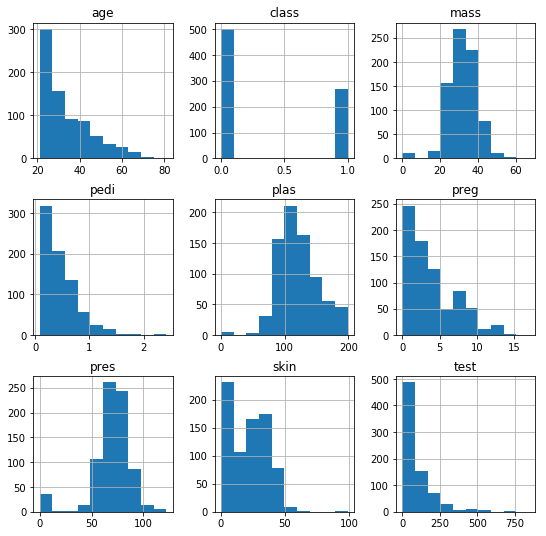

In [9]:
# see the histograms
dataset.hist(sharex=sharex, sharey=sharey, xlabelsize=xlabelsize, ylabelsize=ylabelsize, figsize=figsize)
plt.show()

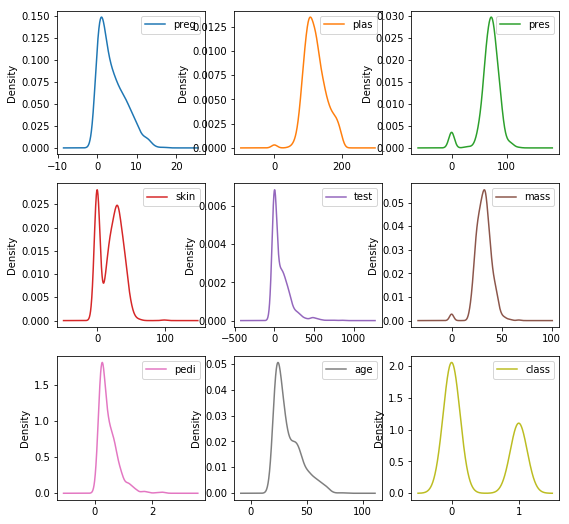

In [10]:
# see the density plots
dataset.plot(kind='density', subplots=subplots, layout=layout, sharex=sharex, figsize=figsize)
plt.show()

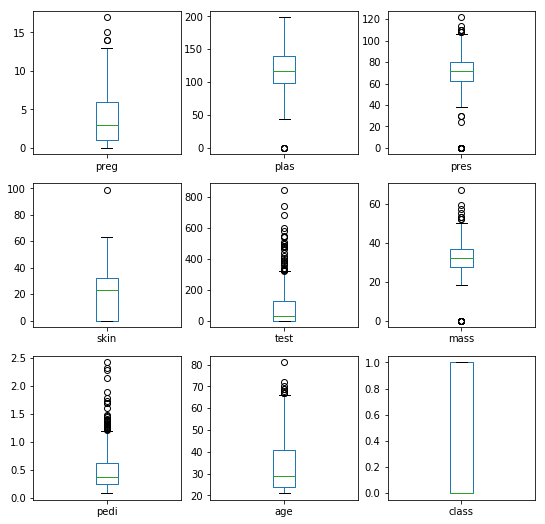

In [11]:
# see the box plots
dataset.plot(kind='box', subplots=subplots, layout=layout, sharex=sharex, sharey=sharey, fontsize=fontsize, figsize=figsize)
plt.show()

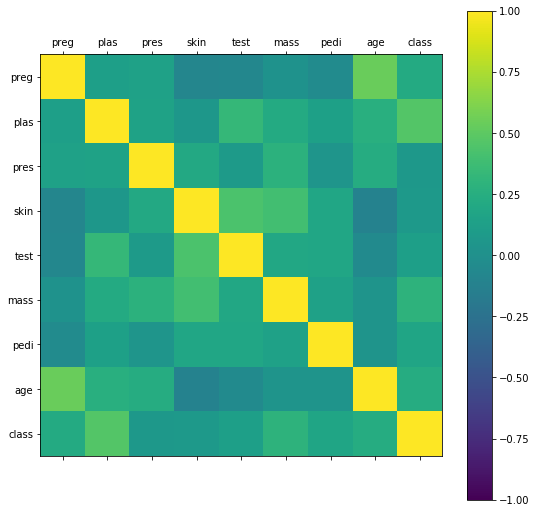

In [12]:
# correlation matrix
correlations = dataset.corr()
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

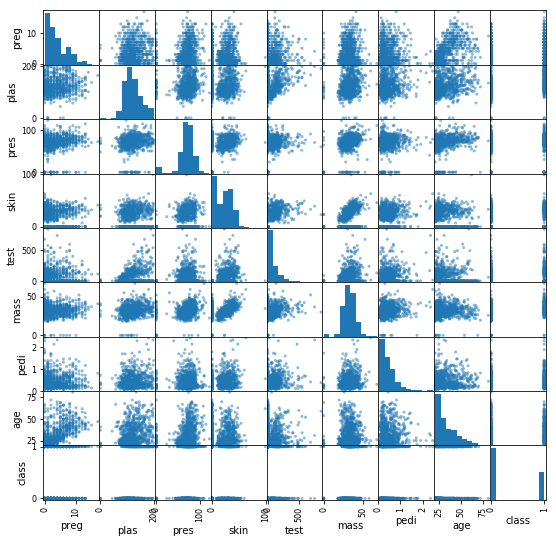

In [13]:
# scatter plot
scatter_matrix(dataset, figsize=figsize)
plt.show()

## Set up validation hold-out set
To be used at the end of this project to confirm the accuracy of the final model. This template holds back 20% of the dataset from analysis/modeling.

In [14]:
data = dataset.values
class_index = num_cols-1  # assmes that the class (y-label) is at the very end of the column list

X = data[:,0:class_index]
y = data[:,class_index]

validation_size = 0.2     # 20% of the dataset
seed = 8

X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(X, y, test_size=validation_size, random_state=seed)

## Evaluate candidate algorithms

In [15]:
# Test options
num_folds = 10
num_instances = len(X_train)

In [16]:
# Evaluation metric
scoring = 'accuracy'

In [17]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [18]:
# Use default tuning parameters for the algorithms
results = []
algorithms = []

for algorithm, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    algorithms.append(algorithm)
    print("%s: %f (%f)" % (algorithm, cv_results.mean(), cv_results.std()))

LR: 0.765256 (0.044786)
LDA: 0.765204 (0.053021)
KNN: 0.726256 (0.034259)
CART: 0.703358 (0.059641)
NB: 0.753808 (0.046519)
SVM: 0.648123 (0.071907)


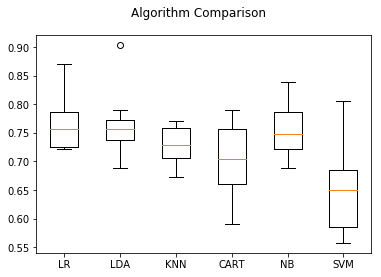

In [19]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algorithms)
plt.show()

## Re-evaluate with scaled standardised data

In [20]:
# Use pipelines to avoid data leakage
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
algorithms = []

for algorithm, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    algorithms.append(algorithm)
    print("%s: %f (%f)" % (algorithm, cv_results.mean(), cv_results.std()))

ScaledLR: 0.766816 (0.057738)
ScaledLDA: 0.765204 (0.053021)
ScaledKNN: 0.734479 (0.049840)
ScaledCART: 0.729429 (0.050479)
ScaledNB: 0.753808 (0.046519)
ScaledSVM: 0.757218 (0.035139)


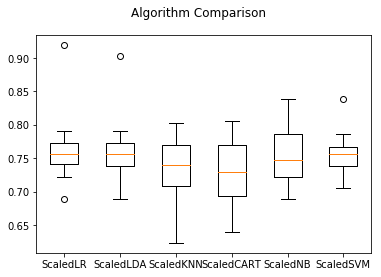

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algorithms)
plt.show()

## Evaluate using ensemble methods

In [22]:
# Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
algorithms = []

for algorithm, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    algorithms.append(algorithm)
    print("%s: %f (%f)" % (algorithm, cv_results.mean(), cv_results.std()))

AB: 0.774987 (0.050511)
GBM: 0.744024 (0.045763)
RF: 0.739265 (0.044685)
ET: 0.732787 (0.032063)


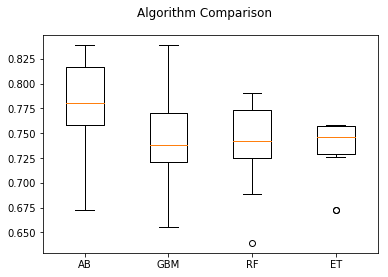

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algorithms)
plt.show()

## Parameter tuning
Select the top performing algorithms for parameter tuning

In [24]:
# add code here
# SigOpt

## Finalise the model
Stack and use predictions from top models as inputs for final model. Confirm using validation dataset.

In [25]:
# add code here